In [70]:
import pandas as pd

In [71]:
df = pd.read_csv("/Users/sambhav/Downloads/Boxify Dataset - Data Analyst Bootcamp.csv")

In [72]:
print(df.head())

   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99         2015   
1              7                 1       1016014.0     24.81         2005   
2              0                 0        340464.0     46.00         2013   
3              4                 1        334011.0    100.00         2006   
4              2                 1       1287938.0    121.95         2010   

   ItemCount  LowUserPrice  LowNetPrice  
0          8         28.97        31.84  
1         39          0.00

In [73]:
# Check for missing values and handle them
print(df.isnull().sum())



Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64


In [74]:
df = df.dropna()

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order             75996 non-null  int64  
 1   File_Type         75996 non-null  object 
 2   SKU_number        75996 non-null  int64  
 3   SoldFlag          75996 non-null  float64
 4   SoldCount         75996 non-null  float64
 5   MarketingType     75996 non-null  object 
 6   ReleaseNumber     75996 non-null  int64  
 7   New_Release_Flag  75996 non-null  int64  
 8   StrengthFactor    75996 non-null  float64
 9   PriceReg          75996 non-null  float64
 10  ReleaseYear       75996 non-null  int64  
 11  ItemCount         75996 non-null  int64  
 12  LowUserPrice      75996 non-null  float64
 13  LowNetPrice       75996 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 8.7+ MB
None


In [76]:
print(df.isnull().sum())

Order               0
File_Type           0
SKU_number          0
SoldFlag            0
SoldCount           0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
dtype: int64


In [77]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


### Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Sales Trends Over Time'}, xlabel='ReleaseYear'>

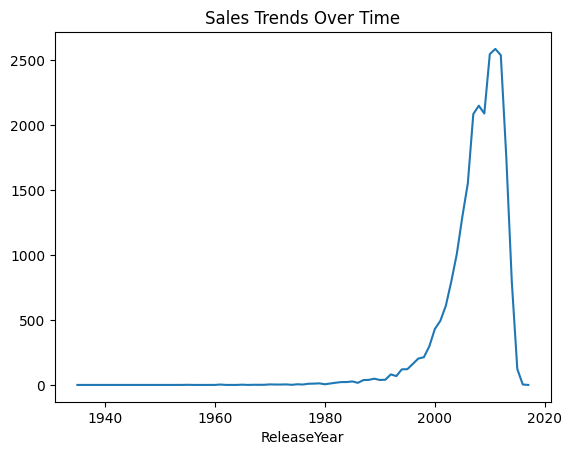

In [78]:
# Sales trends over time (using ReleaseYear as a proxy for Date since no Date column is present)
sales_trends = df.groupby('ReleaseYear').sum()['SoldCount']
sales_trends.plot(kind='line', title='Sales Trends Over Time')

In [116]:
# Calculate stock levels
stock_levels = df.groupby('SKU_number').sum()['ItemCount']
print ("Stock levels")
print(stock_levels)

Stock levels
SKU_number
50001       32
50002       99
50003      105
50004       70
50005       81
          ... 
3951231     24
3951290      4
3951300      6
3959829     30
3959831     44
Name: ItemCount, Length: 75996, dtype: int64


In [80]:
# Calculate stock levels
stock_levels = df.groupby('SKU_number').sum()['ItemCount']

# Top 10 stock levels
top_10_stock_levels = stock_levels.nlargest(10)
print("Top 10 Stock Levels:")
print(top_10_stock_levels)

# Bottom 10 stock levels
bottom_10_stock_levels = stock_levels.nsmallest(10)
print("Bottom 10 Stock Levels:")
print(bottom_10_stock_levels)


Top 10 Stock Levels:
SKU_number
536345     1523
198645     1426
612805      930
543471      853
145889      851
2657148     827
924168      816
134715      721
123283      716
53983       699
Name: ItemCount, dtype: int64
Bottom 10 Stock Levels:
SKU_number
744731     0
764306     0
803858     0
858486     0
1438250    0
1440598    0
1621669    0
1683119    0
1762412    0
1936184    0
Name: ItemCount, dtype: int64


<Axes: title={'center': 'Stock levels'}, xlabel='SKU_number'>

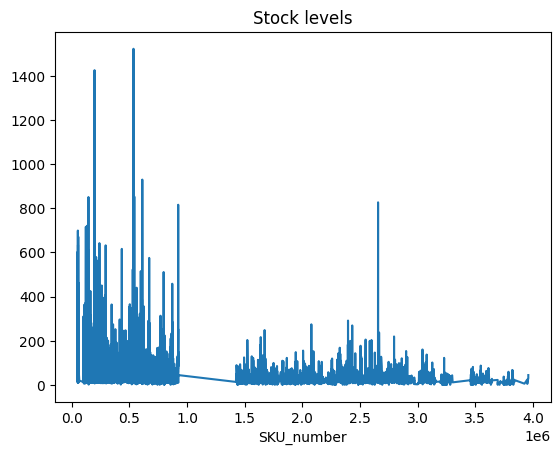

In [81]:
stock_levels.plot(title='Stock levels')

In [82]:
# Identify top-selling products
top_selling_products = df.groupby('SKU_number').sum()['SoldCount'].sort_values(ascending=False).head(10)
print(top_selling_products)

SKU_number
665269    73.0
613864    69.0
141848    51.0
254518    40.0
767846    36.0
55769     36.0
416609    35.0
243550    34.0
141824    33.0
747765    30.0
Name: SoldCount, dtype: float64


# Assumption bottom 10% of stock levels to be low-stock items

In [83]:
# Calculate stock levels
stock_levels = df.groupby('SKU_number').sum()['ItemCount']

# Calculate the 10th percentile of stock levels
threshold = stock_levels.quantile(0.10)
print(f"Threshold for low stock items: {threshold}")

# Identify low-stock items
low_stock_items = stock_levels[stock_levels < threshold]
print(low_stock_items)


Threshold for low stock items: 16.0
SKU_number
50906      15
53059      12
53142      11
53310       9
53676      15
           ..
3838158    12
3878711    14
3926499     5
3951290     4
3951300     6
Name: ItemCount, Length: 6813, dtype: int64


In [84]:
# Calculate Inventory Turnover
total_sold = df.groupby('SKU_number')['SoldCount'].sum()
average_inventory = df.groupby('SKU_number')['ItemCount'].mean()


In [85]:
# Check if SoldCount and ItemCount have valid values
print("Total Sold Counts: ")
print(total_sold.describe())
print("\nAverage Inventory Levels: ")
print(average_inventory.describe())

Total Sold Counts: 
count    75996.000000
mean         0.322306
std          1.168615
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         73.000000
Name: SoldCount, dtype: float64

Average Inventory Levels: 
count    75996.000000
mean        43.843637
std         37.362231
min          0.000000
25%         22.000000
50%         34.000000
75%         53.000000
max       1523.000000
Name: ItemCount, dtype: float64


In [86]:
# Calculate Inventory Turnover
inventory_turnover = total_sold / average_inventory
print("Inventory Turnover:")
print(inventory_turnover)


Inventory Turnover:
SKU_number
50001      0.0
50002      0.0
50003      0.0
50004      0.0
50005      0.0
          ... 
3951231    0.0
3951290    0.0
3951300    0.0
3959829    0.0
3959831    0.0
Length: 75996, dtype: float64


In [87]:
# Calculate inventory turnover
df['InventoryTurnover'] = df['SoldCount'] / df['ItemCount']


In [88]:
# Calculate Inventory Turnover
inventory_turnover = df.groupby('SKU_number')['SoldCount'].sum() / df.groupby('SKU_number')['ItemCount'].mean()
print(inventory_turnover)


SKU_number
50001      0.0
50002      0.0
50003      0.0
50004      0.0
50005      0.0
          ... 
3951231    0.0
3951290    0.0
3951300    0.0
3959829    0.0
3959831    0.0
Length: 75996, dtype: float64


In [89]:
# Filter out SKUs with a SoldCount of zero to avoid division by zero in stock-to-sales ratio calculation
non_zero_sales = df.groupby('SKU_number').filter(lambda x: x['SoldCount'].sum() > 0)

In [90]:
# Calculate Stock-to-Sales Ratio for SKUs with non-zero SoldCount
stock_to_sales_ratio = non_zero_sales.groupby('SKU_number')['ItemCount'].sum() / non_zero_sales.groupby('SKU_number')['SoldCount'].sum()
print("Stock-to-Sales Ratio:")
print(stock_to_sales_ratio)


Stock-to-Sales Ratio:
SKU_number
50006       93.0
50018      107.0
50020       74.0
50037       75.0
50040       60.0
           ...  
3822578     67.0
3823081     11.0
3828995     25.0
3829664      9.0
3926499      5.0
Length: 12996, dtype: float64


In [91]:
# Assuming you have average sales rates and lead times (in days)
average_sales_rate = df.groupby('SKU_number')['SoldCount'].mean()
lead_time = 30  # Example lead time in days
safety_factor = 1.5  # Example safety factor

In [92]:
# Calculate Stock-to-Sales Ratio
stock_to_sales_ratio = df.groupby('SKU_number')['ItemCount'].sum() / df.groupby('SKU_number')['SoldCount'].sum()
print(stock_to_sales_ratio)


SKU_number
50001      inf
50002      inf
50003      inf
50004      inf
50005      inf
          ... 
3951231    inf
3951290    inf
3951300    inf
3959829    inf
3959831    inf
Length: 75996, dtype: float64


In [93]:
# Define threshold as safety stock level
low_stock_items_safety = stock_levels[stock_levels < safety_stock]
print("Low stock items based on safety stock threshold:")
print(low_stock_items_safety)

Low stock items based on safety stock threshold:
SKU_number
50044      214
50053       41
50055       40
50063      143
50067      113
          ... 
3822502     25
3823081     22
3828995     25
3829664      9
3926499      5
Name: ItemCount, Length: 8119, dtype: int64


<Axes: title={'center': 'Sales Trends Over Time'}, xlabel='ReleaseYear'>

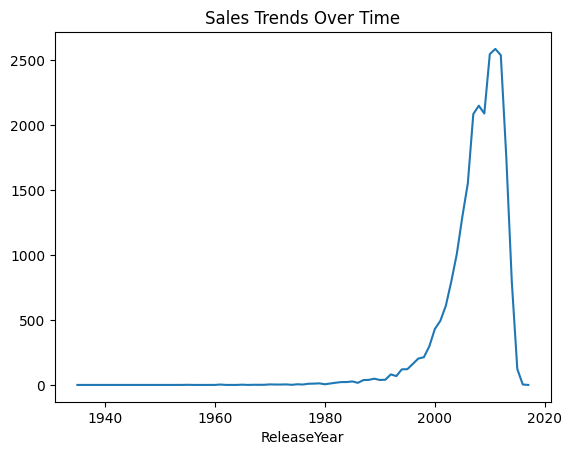

In [94]:
# Sales trends over time (using ReleaseYear as a proxy for Date since no Date column is present)
sales_trends = df.groupby('ReleaseYear').sum()['SoldCount']
sales_trends.plot(kind='line', title='Sales Trends Over Time')

In [95]:
# Define a small constant to avoid division by zero
epsilon = 1e-10

# Calculate Stock-to-Sales Ratio
stock_to_sales_ratio = df.groupby('SKU_number')['ItemCount'].sum() / (df.groupby('SKU_number')['SoldCount'].sum() + epsilon)
print(stock_to_sales_ratio)


SKU_number
50001      3.200000e+11
50002      9.900000e+11
50003      1.050000e+12
50004      7.000000e+11
50005      8.100000e+11
               ...     
3951231    2.400000e+11
3951290    4.000000e+10
3951300    6.000000e+10
3959829    3.000000e+11
3959831    4.400000e+11
Length: 75996, dtype: float64


In [96]:
# Assuming you have average sales rates and lead times (in days)
average_sales_rate = df.groupby('SKU_number')['SoldCount'].mean()
lead_time = 30  # Example lead time in days
safety_factor = 1.5  # Example safety factor


In [97]:
# Calculate safety stock
safety_stock = average_sales_rate * lead_time * safety_factor
print(safety_stock)


SKU_number
50001      0.0
50002      0.0
50003      0.0
50004      0.0
50005      0.0
          ... 
3951231    0.0
3951290    0.0
3951300    0.0
3959829    0.0
3959831    0.0
Name: SoldCount, Length: 75996, dtype: float64


# Inventory Insights and Recommendations

In [98]:
# Calculate Inventory Turnover
inventory_turnover = df.groupby('SKU_number')['SoldCount'].sum() / df.groupby('SKU_number')['ItemCount'].mean()
print(inventory_turnover)

SKU_number
50001      0.0
50002      0.0
50003      0.0
50004      0.0
50005      0.0
          ... 
3951231    0.0
3951290    0.0
3951300    0.0
3959829    0.0
3959831    0.0
Length: 75996, dtype: float64


In [99]:
# Calculate Stock-to-Sales Ratio
stock_to_sales_ratio = df.groupby('SKU_number')['ItemCount'].sum() / df.groupby('SKU_number')['SoldCount'].sum()
print(stock_to_sales_ratio)


SKU_number
50001      inf
50002      inf
50003      inf
50004      inf
50005      inf
          ... 
3951231    inf
3951290    inf
3951300    inf
3959829    inf
3959831    inf
Length: 75996, dtype: float64


In [100]:
# Determine Reorder Points (example calculation, assuming a lead_time of 30 days)
lead_time = 30  # Example lead time in days
reorder_points = df.groupby('SKU_number')['SoldCount'].mean() * lead_time

In [101]:
# Actionable Recommendations
recommendations = {
    'Top-selling products': top_selling_products.index.tolist(),
    'Reorder Points': reorder_points
}


In [102]:
print(recommendations)

{'Top-selling products': [665269, 613864, 141848, 254518, 767846, 55769, 416609, 243550, 141824, 747765], 'Reorder Points': SKU_number
50001      0.0
50002      0.0
50003      0.0
50004      0.0
50005      0.0
          ... 
3951231    0.0
3951290    0.0
3951300    0.0
3959829    0.0
3959831    0.0
Name: SoldCount, Length: 75996, dtype: float64}


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


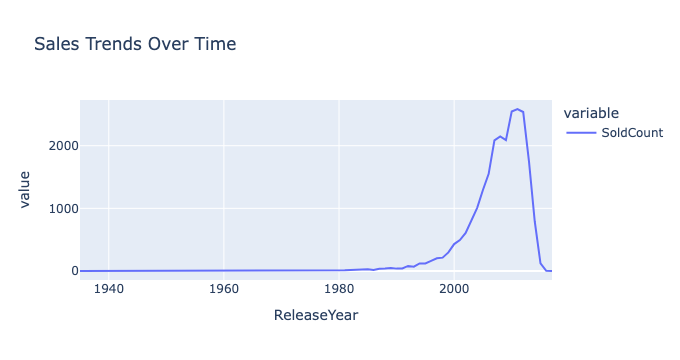

In [104]:
# Sales trends over time (interactive plot using Plotly)
fig = px.line(sales_trends, title='Sales Trends Over Time')
fig.show()


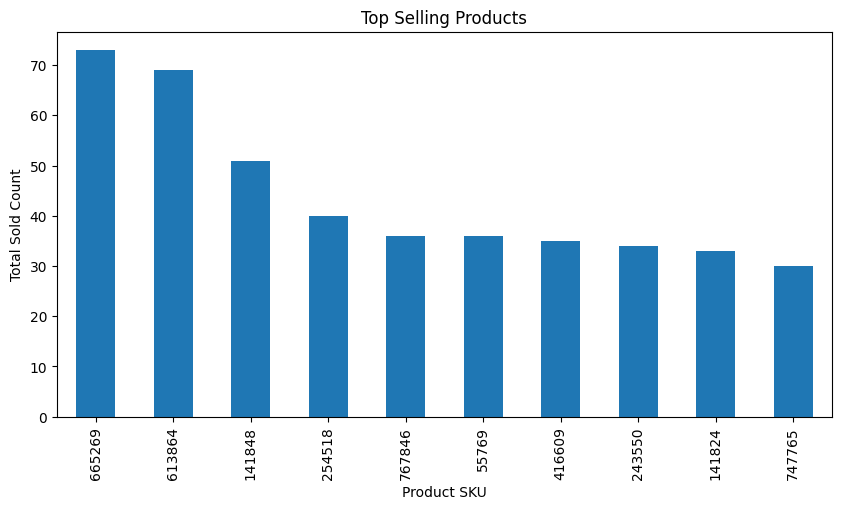

In [105]:
# Top-selling products
plt.figure(figsize=(10, 5))
top_selling_products.plot(kind='bar', title='Top Selling Products')
plt.xlabel('Product SKU')
plt.ylabel('Total Sold Count')
plt.show()

In [106]:
# Identify top-selling products
top_selling_products = df.groupby('SKU_number').sum()['SoldCount'].sort_values(ascending=False).head(10)
print("Top Selling Products:")
print(top_selling_products)

Top Selling Products:
SKU_number
665269    73.0
613864    69.0
141848    51.0
254518    40.0
767846    36.0
55769     36.0
416609    35.0
243550    34.0
141824    33.0
747765    30.0
Name: SoldCount, dtype: float64


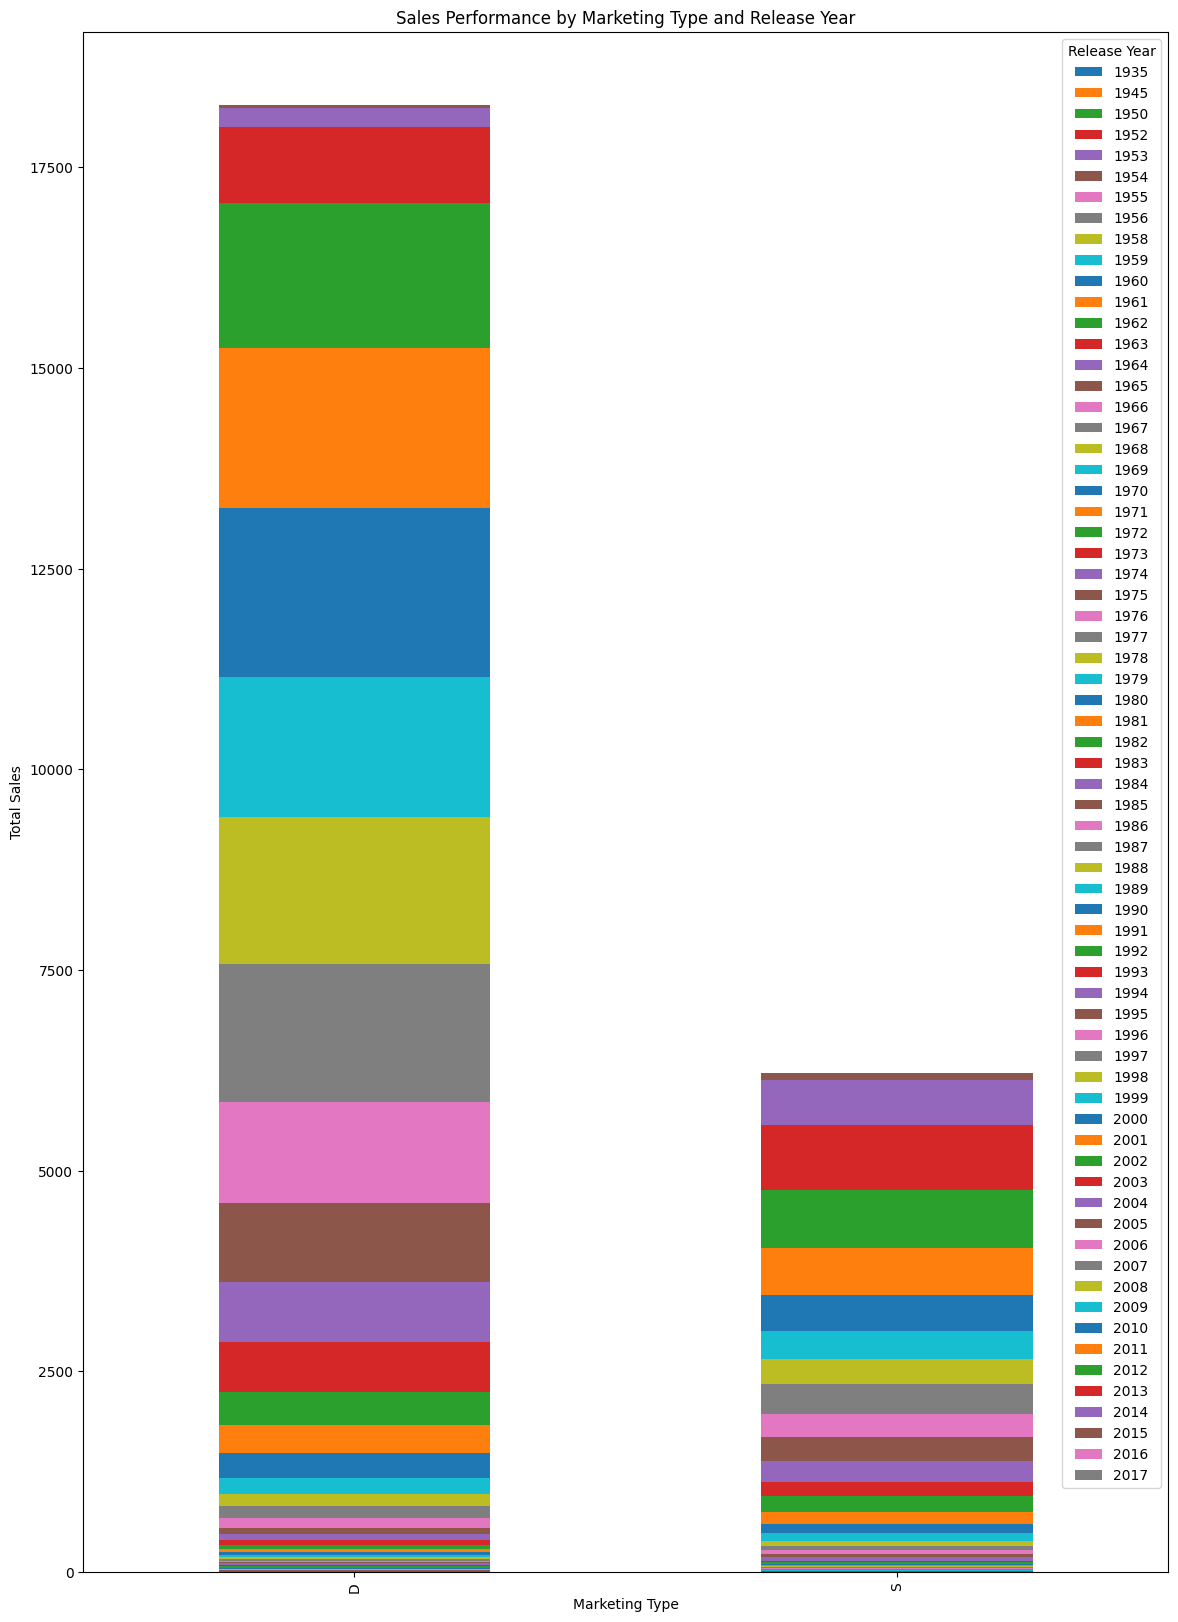

In [107]:
# Sales Performance by Marketing Type and Release Year
sales_by_marketing_release = df.groupby(['MarketingType', 'ReleaseYear']).sum()['SoldCount'].unstack()
sales_by_marketing_release.plot(kind='bar', stacked=True, figsize=(14, 20))
plt.title('Sales Performance by Marketing Type and Release Year')
plt.xlabel('Marketing Type')
plt.ylabel('Total Sales')
plt.legend(title='Release Year')
plt.show()

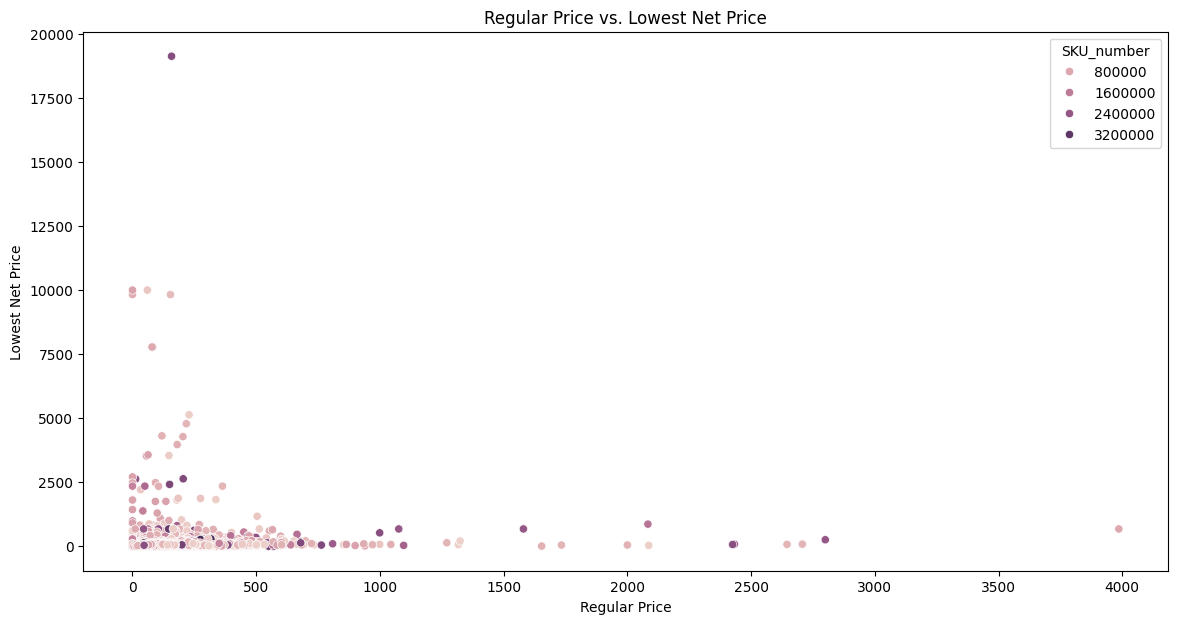

In [109]:
# Regular Price vs. Lowest Net Price
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='PriceReg', y='LowNetPrice', hue='SKU_number')
plt.title('Regular Price vs. Lowest Net Price')
plt.xlabel('Regular Price')
plt.ylabel('Lowest Net Price')
plt.show()

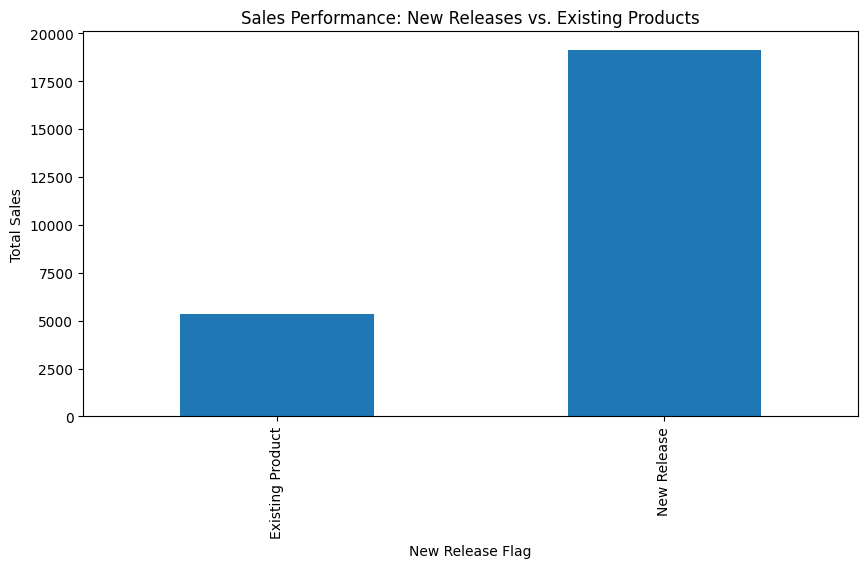

In [110]:
# Sales Performance for New Releases vs. Existing Products
sales_by_release_flag = df.groupby('New_Release_Flag').sum()['SoldCount']
sales_by_release_flag.plot(kind='bar', figsize=(10, 5))
plt.title('Sales Performance: New Releases vs. Existing Products')
plt.xlabel('New Release Flag')
plt.ylabel('Total Sales')
plt.xticks(ticks=[0, 1], labels=['Existing Product', 'New Release'])
plt.show()


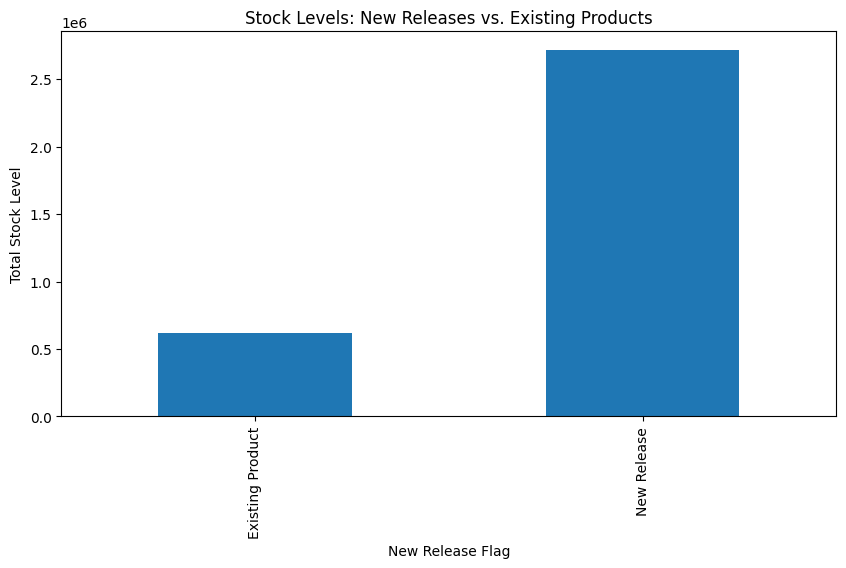

In [111]:
# Stock Levels for New Releases vs. Existing Products
stock_by_release_flag = df.groupby('New_Release_Flag').sum()['ItemCount']
stock_by_release_flag.plot(kind='bar', figsize=(10, 5))
plt.title('Stock Levels: New Releases vs. Existing Products')
plt.xlabel('New Release Flag')
plt.ylabel('Total Stock Level')
plt.xticks(ticks=[0, 1], labels=['Existing Product', 'New Release'])
plt.show()

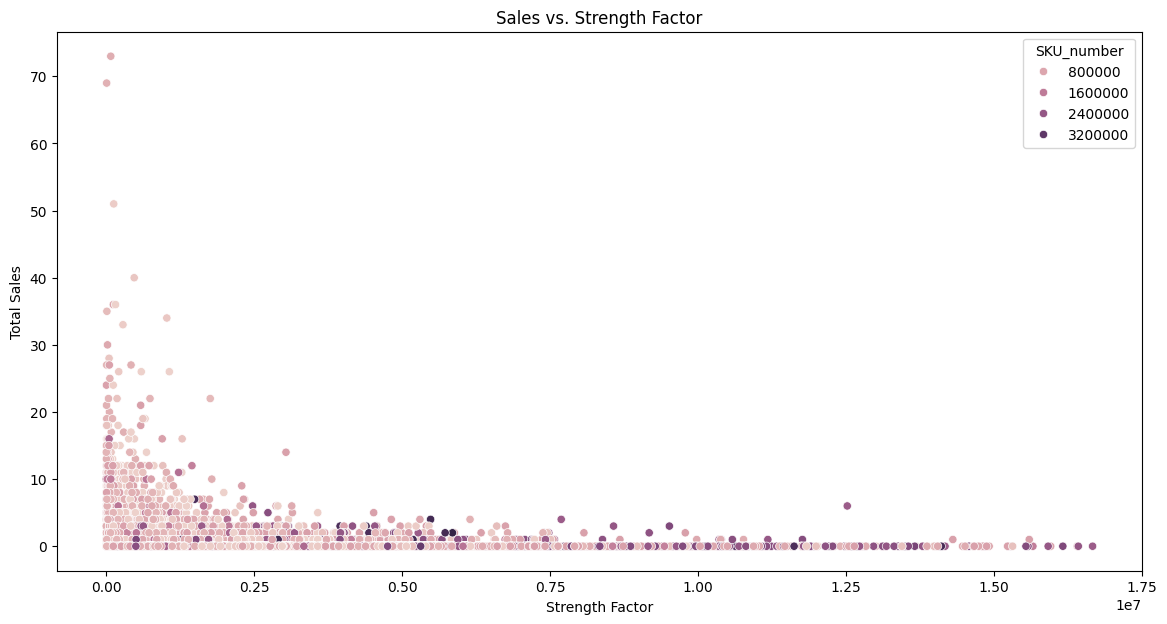

In [112]:
# Sales vs. Strength Factor
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='StrengthFactor', y='SoldCount', hue='SKU_number')
plt.title('Sales vs. Strength Factor')
plt.xlabel('Strength Factor')
plt.ylabel('Total Sales')
plt.show()


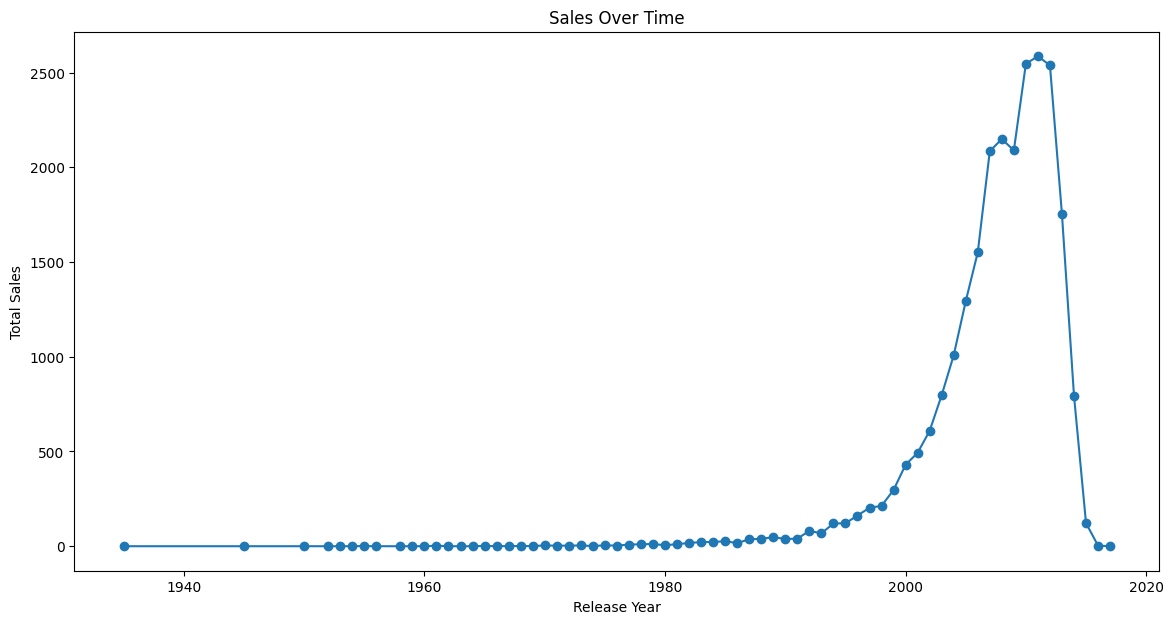

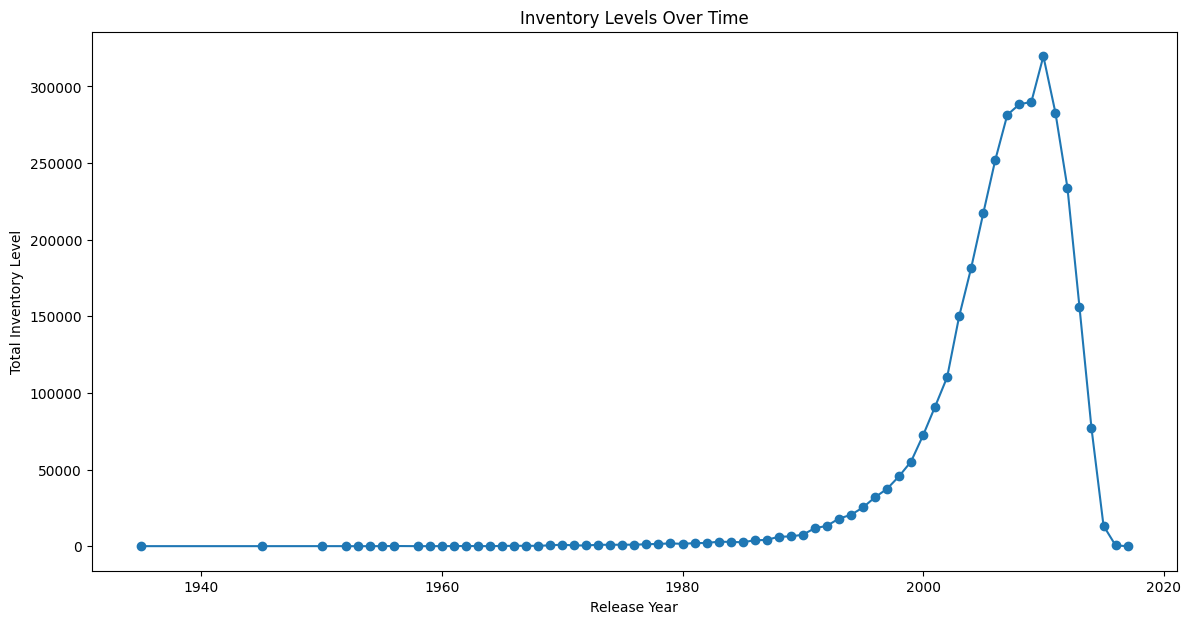

In [113]:
# Sales Over Time
sales_by_year = df.groupby('ReleaseYear').sum()['SoldCount']
sales_by_year.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Sales Over Time')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.show()

# Inventory Levels Over Time
inventory_by_year = df.groupby('ReleaseYear').sum()['ItemCount']
inventory_by_year.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Inventory Levels Over Time')
plt.xlabel('Release Year')
plt.ylabel('Total Inventory Level')
plt.show()
